# 03- Ensembles
** APSTA - LEARN - Ecole Centrale Nantes **

** Diana Mateus **

PARTICIPANTS: **(Fill in your names)**

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## 1. Decision stumps
A decision stump is a machine learning model consisting of a one-level decision tree. That is, it is a decision tree with one internal node (the root) which is immediately connected to the terminal nodes (its leaves). A decision stump makes a prediction based on the value of just a single input feature. Sometimes they are also called 1-rules [Wikipedia]

***a)*** Run the provided code to generate and plot a toy dataset consisting of 2D points and 4 classes



(225, 2)
3
0


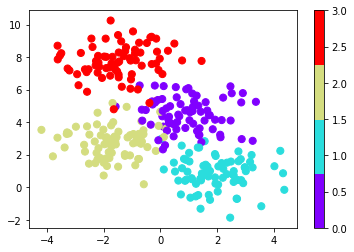

In [3]:
#a) Load and plot dataset, split in train and test sets
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

n_classes = 4
X, y = make_blobs(n_samples=300, centers=n_classes,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.get_cmap('rainbow', 4));
plt.colorbar();

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

print(Xtrain.shape)
print(np.amax(y))
print(np.amin(y))


**b)** Implement a function that generates a random linear axis-aligned ***stump*** according to the number of features of a given dataset. The function should return 
    - the index of one randomly chosen features (dimension) 
    - as well as a randomly chosen threshold within the min and max values of the chosen feature.
``` python
def stump(Xtrain):
```
**c)**  Make a function **split** that 
    - receives as input the parameters generated by the stump function above. 
    - Partitions the **training** dataset in two subsets.
The output should be two arrays, each containing the _indices_ of the points belonging to one or the other subset. To verify the implementation, run the split function several times, and display the resulting subsets as 2D pointsets with different colors.
``` python
def split(Xtrain, feature, threshold):
```
**d)** Implement a function ***leaf*** that computes and returns the class distribution (normalized histogram #points vs classes) 
    - of the original training set (before the split), 
    - for each of the 2 subsets resulting from after the split has been applied.

``` python
def split_distributions(ytrain,ind_left, ind_right):
```
**e)** Using the output of **split_distributions** Create a function ***information_gain*** that receives the full training dataset (Xtrain and ytrain) and the indices of two subsets resulting from the current split. Use the **entropy** to compute the information gain.
``` python
def information_gain(ytrain,ind_left, ind_right):
```
```Hints: ``` 
- a detailed example is given here: http://www.bogotobogo.com/python/scikit-learn/scikt_machine_learning_Decision_Tree_Learning_Informatioin_Gain_IG_Impurity_Entropy_Gini_Classification_Error.php
- when computing the Entropy, ignore the classes with zero probabilities, and carry on summation using the same equation.





**f)** Create a function ***train*** that receives as parameters the full training dataset (Xtrain and ytrain) as well as the number of random stumps to try. The function will 
- generate the desired number of stumps, 
- split the dataset according to each stump, 
- evaluate the ***information gain*** for each split
- choose and then return the parameters of the best stump.

``` python
def train_stumps(Xtrain, ytrain, trials):
```

**g)** train an ensemble of stumps, average the prediction results and then print the performance (accuracy)



In [4]:
from random import randint, uniform

# b) Stumps

def stump(xx):
    f = randint(0, int(xx.shape[1])-1) #randomly select a feature/dimension randint()
    #print('feature_dim = ', f)
    t = uniform(np.amin(xx[:,f]), np.amax(xx[:,f]))#sample from an uniform() between the min and max values of the feature
    return f,t 

# c) Split

def split(xx, f, t):
    index_left = np.where(xx[:, f] < t)
    #print(np.array(xx[index_left]).shape)
    index_right = np.where(xx[:, f] >= t)
    #print(np.array(xx[index_right]).shape)
    
    ind_l, = index_left  #points going to the left child
    ind_r, = index_right #points going to the right child
    return ind_l, ind_r #return indices


# d) Leaf probabilities
def class_distribution(yy, n_classes):
    bin_edges = list(range(n_classes))
    bins = []
    for y in bin_edges:
        nums = int(yy[np.where(yy==y)].shape[0])
        bins.append(nums)
    proba = np.array(bins)
    proba = proba / np.sum(proba)
    return proba, np.array(bin_edges)
    
def split_distributions(yy, ind_l, ind_r, n_classes):
    proba, bins = class_distribution(yy, n_classes)
    proba_l, bins_l = class_distribution(np.array(yy[ind_l]), n_classes)
    proba_r, bins_r = class_distribution(np.array(yy[ind_r]), n_classes)
    bin_edges = np.array(list(range(n_classes+1)), np.float32)
    return proba, proba_l, proba_r, bin_edges


# e) information gain 
def entropy(p):
    # p = (4,)
    p_nonzero = np.array(p[np.where(p!=0)])
    ent = -1 * np.dot(p_nonzero, np.log2(p_nonzero))
    return ent

def information_gain(yy, ind_l, ind_r, n_clasess):
    proba, proba_l, proba_r, bin_edges = split_distributions(yy, ind_l, ind_r, n_classes)
    #print('proba = ', proba, ' proba_l = ', proba_l, ' proba_r = ', proba_r, ' bin_edges = ', bin_edges)
    Hq = entropy(proba)
    Hleft = entropy(proba_l)
    Hright = entropy(proba_r)
    #print('Hq = ', Hq, ' Hleft=', Hleft, ' Hright=', Hright)
    N = np.array(yy).shape[0]
    Nleft = np.array(yy[ind_l]).shape[0]
    Nright = np.array(yy[ind_r]).shape[0]
    info_gain = Hq - (Nleft/N) * Hleft - (Nright/N) * Hright
    return info_gain


Stump parameters 0 -2.2086826611576527
Sizes of (original set, left subset, right subset)) 225 (30,) (195,)
Info Gain 0.14349559353126096


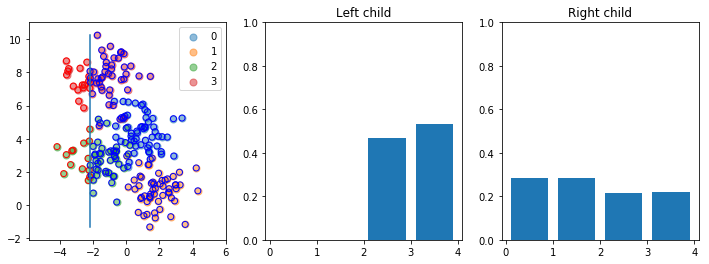

In [5]:
#-------Runing functions from a, e-------------


feat, th = stump(Xtrain)
print('Stump parameters', feat, th)
ind_l,ind_r = split(Xtrain, feat, th)
print('Sizes of (original set, left subset, right subset))', len(ytrain), ind_l.shape, ind_r.shape)

#Compute the information gain based measures
p, p_l, p_r, bins = split_distributions(ytrain, ind_l, ind_r, n_classes)
print('Info Gain', information_gain(ytrain,ind_l, ind_r, n_classes))

#-------Plotting functions-------------
fig, ax = plt.subplots(1,3,figsize=(12, 4))

#Plot the training points with their ground truth class
for c in range(n_classes):
    X0_c=Xtrain[np.where(ytrain==c), 0]
    X1_c=Xtrain[np.where(ytrain==c), 1]
    y_c=c*np.ones(np.shape(Xtrain[np.where(ytrain==c),0]))
    ax[0].scatter(X0_c,X1_c, s=50,alpha=0.5,cmap=plt.cm.get_cmap('rainbow', 4),label=str(c))

ax[0].axis('equal')

#draw the separation of the points by drawing a circle around the original point sets
ax[0].scatter(Xtrain[ind_l, 0], Xtrain[ind_l, 1], c='none', edgecolor='r')
ax[0].scatter(Xtrain[ind_r, 0], Xtrain[ind_r, 1], c='none', edgecolor='b')

#draw a threshold line
if feat == 0:
    ax[0].plot([th,th],[np.min(Xtrain[:,1]),np.max(Xtrain[:,1])])
elif feat == 1:
    ax[0].plot([np.min(Xtrain[:,0]),np.max(Xtrain[:,0])],[th,th])
leg = ax[0].legend();

# Show the histograms over the classes for each subset
center = (bins[:-1] + bins[1:]) / 2
ax[1].bar(center, p_l, align='center')
ax[1].set_ylim((0, 1.0))
ax[1].set_title('Left child')
ax[2].bar(center, p_r, align='center')
ax[2].set_ylim((0, 1.0))
ax[2].set_title('Right child')

plt.show()


/Users/saitouyuuki/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide


ind_l [  0   2   5   7   9  16  18  21  25  27  29  34  36  39  42  44  49  50
  53  56  59  61  62  64  65  66  68  71  72  73  74  77  78  81  86  87
  88  90  91  92  93  98 100 101 104 106 107 110 113 114 115 119 121 124
 129 130 131 132 133 134 135 136 138 141 143 145 146 148 149 150 151 152
 153 157 161 163 168 171 174 176 177 179 181 183 185 186 187 190 191 197
 200 206 207 209 210 211 212 213 214 216 219 220 222 223 227 228 231 232
 234 235 236 240 242 244 245 247 248 249 250 252 256 257 260 261 263 264
 265 267 270 272 274 275 282 283 286 291 295 298 299 302 305 311 312 315
 317 320 322 324 325 326 327 330 332 336 337 339 340 341 344 348 349 350
 353 357 359 361 362 363 365 368 370 372 373 375 379 380 382 395 396 397
 399 402 403 405 406 407 414 417 418 419 420 422 425 428 429 430 431 433
 434 438 444 445 446 447 449]
ind_r [  1   3   4   6   8  10  11  12  13  14  15  17  19  20  22  23  24  26
  28  30  31  32  33  35  37  38  40  41  43  45  46  47  48  51  52  54
  55  57 

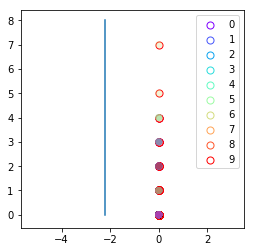

Accuracy: 0.182


In [19]:
from sklearn import metrics

#f) train a stump
def train_stump(Xtrain, ytrain, trials):
    feature=None
    threshold=None
    best_p_l = None #probability distribution left child
    best_p_r = None #probability distribution right child
    best_info_gain = 0
    
    n_classes = np.max(ytrain)+1
    for i in range(trials):
        feat, th = stump(Xtrain)
        ind_l,ind_r = split(Xtrain, feat, th)
        info_gain = information_gain(ytrain,ind_l, ind_r, n_classes)
        if best_info_gain < info_gain:
            best_info_gain = info_gain
            p, best_p_l, best_p_r, bins = split_distributions(ytrain, ind_l, ind_r, n_classes)
            feature = feat
            threshold = th
    return feature, threshold, best_p_l, best_p_r
            
    

def test_stump(Xtest, f, t, p_l, p_r):
    ind_l,ind_r = split(Xtest, f, t)
    pred = np.zeros(Xtest.shape[0])
    pred_l = np.argmax(p_l)
    pred_r = np.argmax(p_r)
    pred[ind_l] = pred_l
    pred[ind_r] = pred_r
    return pred
    
    
    
    
#---------------Run the functions------------------
number_of_trials = 10
f, t, p_l, p_r = train_stump(Xtrain, ytrain, number_of_trials)
y_pred = test_stump(Xtest, f, t, p_l, p_r)


#---------------Plot results ------------------

#Plot the ground thruth classes vs predictions
fig, ax = plt.subplots(figsize=(4, 4))

colors = np.random.random((len(ytest), 3))
cmap=plt.cm.get_cmap('rainbow', n_classes)

#draw predictions    
for c in range(n_classes):
    ind = np.where(y_pred==c)
    X0_c=Xtest[ind, 0]
    X1_c=Xtest[ind, 1]
    y_c=c*np.ones([len(ind),0])
    color = cmap(c)
    ax.scatter(X0_c,X1_c, c='w',s=50,edgecolors=color,label=str(c))
    
#draw ground truth
ax.scatter(Xtest[:, 0], Xtest[:, 1], c=ytest, s=50, edgecolors='none', cmap=plt.cm.get_cmap('rainbow', 4),alpha=0.3);

#draw threshold line
if feat == 0:
    ax.plot([th,th],[np.min(Xtrain[:,1]),np.max(Xtrain[:,1])])
elif feat == 1:
    ax.plot([np.min(Xtrain[:,0]),np.max(Xtrain[:,0])],[th,th])

ax.axis('equal')
leg = ax.legend();

plt.show()

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
print('Accuracy: {:.3f}'.format(metrics.accuracy_score(ytest, y_pred)))

In [7]:
#g) train a series of stumps, average the results and then print the performance (accuracy)
number_of_trials = 10
series_of_stumps = 50

pred_list = []
for i in range(series_of_stumps):
    f, t, p_l, p_r = train_stump(Xtrain, ytrain, number_of_trials)
    y_pred = test_stump(Xtest, f, t, p_l, p_r)
    pred_list.append(y_pred)
    
avg_pred = np.round(np.mean(np.array(pred_list), axis=0))



print('Accuracy: {:.3f}'.format(metrics.accuracy_score(ytest, avg_pred)))


Accuracy: 0.720


## 2. Decision Trees

Random forests are an example of an *ensemble learner* built on decision trees. Decision trees are very intuitive:  ask a sequence of binary questions (stumps) to hierarchicaly split data points in different groups. The binary splitting makes the training and testing extremely efficient. The difficulty lies in choosing the *right questions* to ask. Is common to use a randomized optimization algorithm to explore different features and decide which questions (or "splits") provide the most information. The result is a very fast **non-parametric** classification. 

Use the provided code based IPython's ``interact`` and some functions from **fig_code** folder to visualize a decision tree in action and answer to the questions

**a) Visualizing a decision tree**. Increase the depth and observe:
- How are decision trees linked to the stumps trained above?

In the stumps implemented above is simple one-level decision tree. The decision only depends on a single input feature. A normal decision tree is much more complicated to this decision stumps. We compute decision stumps for each nodes again and again, and build multi-lavel decision tree. Also, we have to use multi features of input data for a decision in each node. We repeat these procedures and if we reached the maximum depth ,or if we exclude the inpureness of node ,we finish making a decision tree.

- In which regions do new splits appear?

Around the boundary between different kinds of data.
It means, the decision tree can correctly classify the data.

- What happens with the splits as depth increases?

The Splits increases.

**b)** Split the dataset in half and fit a decision tree to each half and visualize.
- Describe the differences in the classification obtained with the two trees

In the first half set, the red region is larger than that of in the later half set.
Also,in the first half set, the blue region eat away the yellow region.
However, both Figiures almost lokoks like same. (The number of data in each classes aren't so different)

- What does this tell you about the bias and variance of the classifier?

 In each Figure below, the region sometimes eat away the other class region and cthe tree can correctly classify the 
each trainig data so well.
This means in each decision tree(classifier), the bias is small. (status that data cannot be split anymore)
 However, if we use these decision trees for test, we will get so unstable prediction since each tree have tends to be overfitted to training data. so, in each tree(classifier), there is a high variance. 

- When is this behaviour problematic? (Explain)

 To overcome above problem about a single decision tree(classifier), we should use ansamble traiing.
In this case, we avergae the result with these 2 decision trees and expects to lower the variance of decision tree keeping its bias small. 
However, if the different trees are similar to each other (high correlation between different trees), we cannot lower the variance easily.  


**c) Bootstraping ** sample 100 subsets from the original dataset and give each to a different tree to train. Average and show the results for the full test set



In [8]:
#2. a) Visualizing a decision tree

import fig_code

from fig_code import visualize_tree, plot_tree_interactive
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)

plot_tree_interactive(X, y);

/Users/saitouyuuki/opt/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/saitouyuuki/opt/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


interactive(children=(Dropdown(description='depth', options=(1, 5), value=1), Output()), _dom_classes=('widget…

<Figure size 432x288 with 0 Axes>

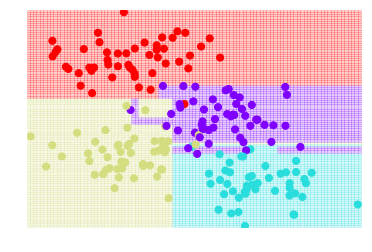

<Figure size 432x288 with 0 Axes>

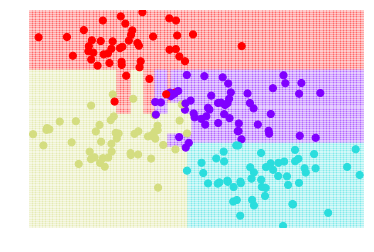

In [9]:
# 2.b)  Subset 
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

plt.figure()
visualize_tree(clf, X[:200], y[:200], boundaries=False)
plt.figure()
visualize_tree(clf, X[-200:], y[-200:], boundaries=False)

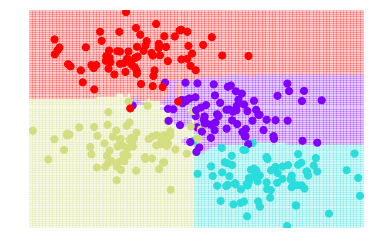

In [10]:
# 2.c)  Subset 

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_tree(clf, X, y, boundaries=False);

## 3. Random Forest for Classifying Digits (or Caltech 101)

We will apply a Random Forest classifier to predict the classes of the **hand-written digits** dataset.

**a)** Run the code to load and visualize the dataset

**b)** Run the code to perform classification with a single decision tree

**c)** Repeat the classification of the dataset
- using a ``sklearn.ensemble.RandomForestClassifier``.  
- How does the ``max_depth``, ``max_features``, and ``n_estimators`` affect the results? 
( Check and print the accuracy and F1 scores for different values of these parameters) 

**d)** Do a gridsearch with crossvalidation varying the three parameters above. 
- What are the best parameters to use for F1 score?

Best params: {'max_depth': 10, 'max_features': 20, 'n_estimators': 100}
Best score: 0.940693164407594

- What's the best F1 score you can reach in the test set?

Accuracy 0.92
F1 score :  0.92

**e)** Recover the probabilistic predictions of the best models on the test set and plot the ROC curve for the microaveraged predictions https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

Size of Data matrix (1797, 64)
Size of target vector (1797,)


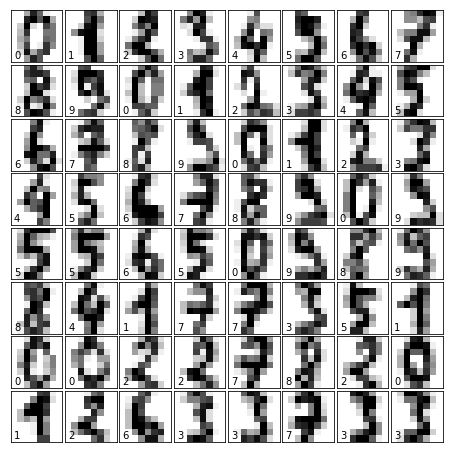

In [11]:
#3.a) Load and visualize dataset
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()
X = digits.data
y = digits.target
print('Size of Data matrix', X.shape)
print('Size of target vector', y.shape)

# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

Xtrain =  (1010, 64)
Xval =  (337, 64)
Xtest =  (450, 64)
0.8333333333333334


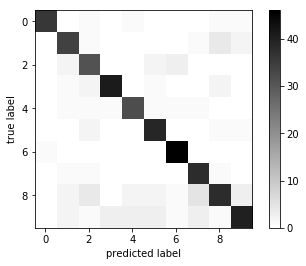

In [12]:
#3.b) Multiclass classification with a decision tree
from sklearn.model_selection import train_test_split
from sklearn import metrics

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)
Xtrain, Xval, ytrain, yval = train_test_split(Xtrain, ytrain, random_state=0)
print('Xtrain = ', Xtrain.shape)
print('Xval = ', Xval.shape)
print('Xtest = ', Xtest.shape)
clf = DecisionTreeClassifier(max_depth=11)
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)

#performance measure
print(metrics.accuracy_score(ypred, ytest))

#confusion matrix
plt.imshow(metrics.confusion_matrix(ypred, ytest),
           interpolation='nearest', cmap=plt.cm.binary)
plt.grid(False)
plt.colorbar()
plt.xlabel("predicted label")
plt.ylabel("true label");

In [13]:
#3.c) Classification with a Random Forest
from sklearn.ensemble import RandomForestClassifier
def RandomForest_test(max_depth, max_features, n_estimators):
    clfRandomForest = RandomForestClassifier(max_depth=max_depth, 
                             max_features=max_features, 
                             n_estimators=n_estimators, 
                             random_state=0)
    clfRandomForest.fit(Xtrain, ytrain)
    ypred_RandomForest = clfRandomForest.predict(Xtest)
    #performance measure
    print('[params] max_depth = {}\n         max_features = {}\n         n_estimators = {}'.format(max_depth, max_features, n_estimators))
    print('Accuracy : ', metrics.accuracy_score(ypred_RandomForest, ytest))
    print('F1 score : ', metrics.f1_score(ypred_RandomForest, ytest, average='micro'))
    


max_depth = None
max_features = "auto" #{“auto”, “sqrt”, “log2”}
n_estimators = 100
RandomForest_test(2, "auto", 50)
RandomForest_test(5, "auto", 50)
RandomForest_test(5, "auto", 100)
RandomForest_test(5, "sqrt", 100)
RandomForest_test(5, "log2", 100)

[params] max_depth = 2
         max_features = auto
         n_estimators = 50
Accuracy :  0.7711111111111111
F1 score :  0.7711111111111111
[params] max_depth = 5
         max_features = auto
         n_estimators = 50
Accuracy :  0.9333333333333333
F1 score :  0.9333333333333333
[params] max_depth = 5
         max_features = auto
         n_estimators = 100
Accuracy :  0.9422222222222222
F1 score :  0.9422222222222222
[params] max_depth = 5
         max_features = sqrt
         n_estimators = 100
Accuracy :  0.9422222222222222
F1 score :  0.9422222222222222
[params] max_depth = 5
         max_features = log2
         n_estimators = 100
Accuracy :  0.9377777777777778
F1 score :  0.9377777777777777


In [14]:
# 3. d) Grid search cross-validation
#uncomment according to version
from sklearn.model_selection import GridSearchCV
#from sklearn.grid_search import GridSearchCV


target_names = ['class 0', 'class 1', 'class 2', 
                'class 3', 'class 4', 'class 5', 
                'class 6', 'class 7', 'class 8', 'class 9']

tuned_parameters = [{'max_depth': [1, 5, 10], 
                     'max_features': [1, 20, 50, 64],
                     'n_estimators': [1, 10, 50, 100]}]

gscv_model = GridSearchCV(RandomForestClassifier(max_depth=5, max_features = 1, n_estimators = 10),
                          cv=5, param_grid = tuned_parameters, scoring='f1_weighted')
gscv_model.fit(Xval, yval)



GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=5, max_features=1,
                                              n_estimators=10),
             param_grid=[{'max_depth': [1, 5, 10],
                          'max_features': [1, 20, 50, 64],
                          'n_estimators': [1, 10, 50, 100]}],
             scoring='f1_weighted')

In [15]:
# Print grid search and cross validation results of each parameter set


# Print best parameters and score
print('Best params:', gscv_model.best_params_)
print('Best score:', gscv_model.best_score_)

# Predict on test set 
ypred = gscv_model.predict(Xtest)

# Print compact report on test set
print(metrics.classification_report(ytest, ypred, target_names = target_names))
print(ytest)
print(ypred)

#performance measure
print('Accuracy', metrics.accuracy_score(ypred, ytest))
print('F1 score : ', metrics.f1_score(ypred, ytest, average='micro'))

Best params: {'max_depth': 10, 'max_features': 20, 'n_estimators': 100}
Best score: 0.940693164407594
              precision    recall  f1-score   support

     class 0       0.95      1.00      0.97        37
     class 1       0.90      0.84      0.87        43
     class 2       0.95      0.89      0.92        44
     class 3       0.93      0.89      0.91        45
     class 4       0.97      0.95      0.96        38
     class 5       0.94      0.92      0.93        48
     class 6       0.94      0.98      0.96        52
     class 7       0.92      0.98      0.95        48
     class 8       0.86      0.92      0.89        48
     class 9       0.85      0.85      0.85        47

    accuracy                           0.92       450
   macro avg       0.92      0.92      0.92       450
weighted avg       0.92      0.92      0.92       450

[2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 1 0 1 8 6 7 7 1 0 7 6 2 1 9 6 7 9 0 0 5 1 6 3 0 2 3 4 1 9 2 6 9

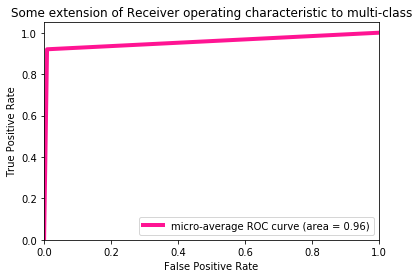

In [16]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.metrics import multilabel_confusion_matrix

from sklearn.preprocessing import label_binarize 
from itertools import cycle


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

n_classes = 10
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(ytest.ravel(), ypred.ravel(), pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])



ytest_ = label_binarize(ytest, classes=list(range(n_classes))) 
ypred_ = label_binarize(ypred, classes=list(range(n_classes))) 

fpr["micro"], tpr["micro"], _ = roc_curve(ytest_.ravel(), ypred_.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    
# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle="solid", linewidth=4)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()